In [1]:
import os
import re
import json
import numpy as np
import matplotlib.pyplot as plt

# %matplotlib inline
# import mpld3
# mpld3.enable_notebook()

In [2]:
def print_metrics(file_path, title, set_axis=False, remove_first=False):
    loss = {'Train': [], 'Val': []}
    mAP = {'Train': [], 'Val': []}
    with open(file_path, 'r') as file:
        for line in file:
            matches = re.search('(Train|Val): loss = (\d*.\d*), mAP = (\d*.\d*)', line)
            if matches:
                mode, l, m = matches.groups()
                loss[mode].append(float(l))
                mAP[mode].append(float(m))
                
    if remove_first:
        loss['Train'] = loss['Train'][1:]
        loss['Val'] = loss['Val'][1:]
        mAP['Train'] = mAP['Train'][1:]
        mAP['Val'] = mAP['Val'][1:]

    x = range(1, len(loss['Train'])+1)
     
    fig = plt.figure(figsize=(15,5))
    fig.suptitle(title)

    plt.subplot(121)
    plt.plot(x, loss['Train'], 'ro-', label='Train')
    plt.plot(x, loss['Val'], 'go-', label='Val')
    if set_axis:
        plt.ylim(0, max([0.7, max(loss['Train'])+0.05, max(loss['Val'])+0.05]))
    plt.ylabel('Loss')
    plt.xlabel('epochs')
    plt.legend()

    plt.subplot(122)
    plt.plot(x, mAP['Train'], 'ro-', label='Train')
    plt.plot(x, mAP['Val'], 'go-', label='Val')
    if set_axis:
        plt.ylim(top=40)
    plt.axhline(max(mAP['Train']), linestyle='--', color='b')
    plt.axhline(max(mAP['Val']), linestyle='--', color='y')
    
    l, r = plt.xlim()
    plt.text(r+.5, max(mAP['Train']), max(mAP['Train']), va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5))
    plt.text(r+.5, max(mAP['Val']), max(mAP['Val']), va='center', ha="left", bbox=dict(facecolor="w",alpha=0.5))
    
    plt.ylabel('mAP')
    plt.xlabel('epochs')
    plt.legend()

    plt.show()
    
    
def show_results(file_name, config_file_name, title, eval_file_name=None, remove_first=False):
    full_file_name = os.path.join(
        '/media/v-pakova/OnlineActionRecognition/source/outputs', file_name)
    full_config_file_name = os.path.join(
        '/media/v-pakova/OnlineActionRecognition/source/OnlineAction/config_files', config_file_name)
    
    with open(full_config_file_name, 'r') as f:
        config = json.load(f)
        
    
    print_metrics(full_file_name, title, remove_first=remove_first)
    
    if eval_file_name:
        with open(eval_file_name, 'r') as file:
            evaluation = file.readlines()
        print(evaluation[-1])
    print('Batch size: {}\nWeight decay: {}\nLearning rate: {}'.format(
        config['batch_size'], config['weight_decay'], config['learning_rate']))
    print('---------------------------------------------------------------------------------------------------------------\n')
    
    

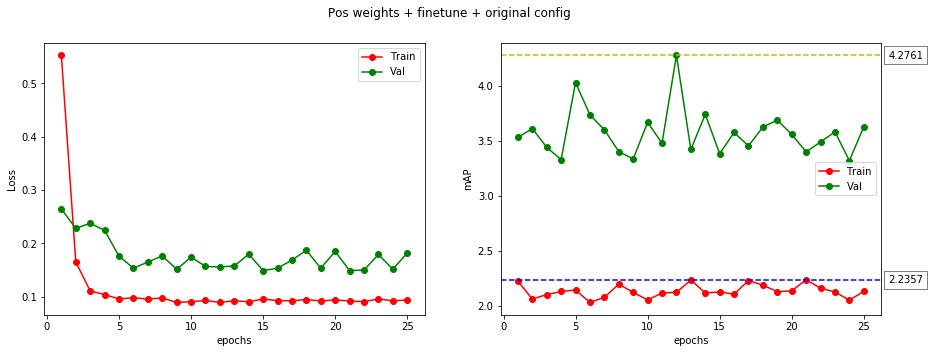

Batch size: 1
Weight decay: 0.0001
Learning rate: [[10, 0.00125], [10, 0.000125], [5, 1.25e-05]]
---------------------------------------------------------------------------------------------------------------



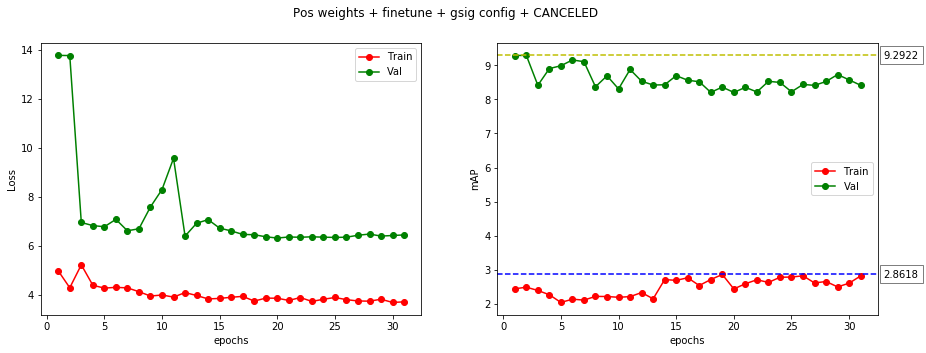

Batch size: 5
Weight decay: 1e-07
Learning rate: [[15, 0.375], [40, 0.0375], [45, 0.00375]]
---------------------------------------------------------------------------------------------------------------



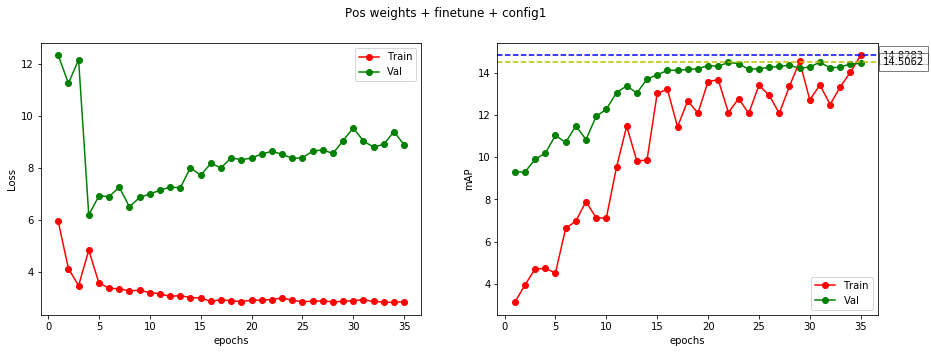

Batch size: 5
Weight decay: 1e-05
Learning rate: [[15, 0.00125], [15, 0.000125], [5, 1.25e-05]]
---------------------------------------------------------------------------------------------------------------



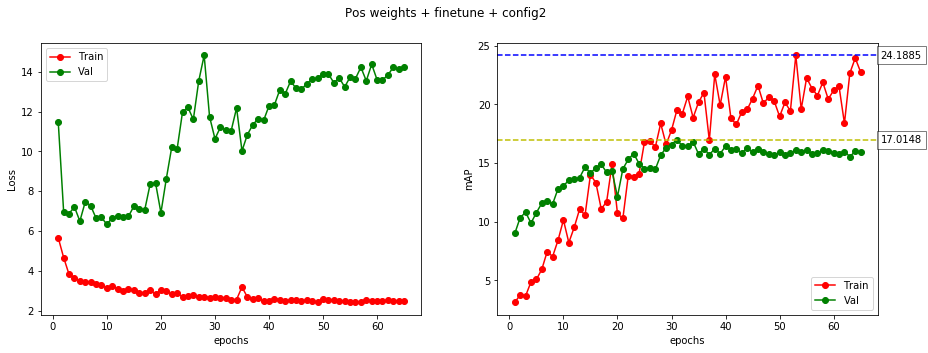

Batch size: 5
Weight decay: 1e-05
Learning rate: [[30, 0.00125], [20, 0.000125], [15, 1.25e-05]]
---------------------------------------------------------------------------------------------------------------



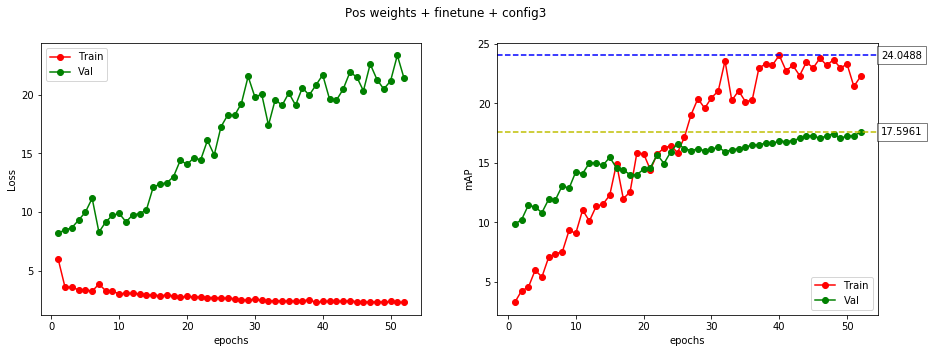

Batch size: 5
Weight decay: 1e-06
Learning rate: [[30, 0.00125], [20, 0.000125], [15, 1.25e-05]]
---------------------------------------------------------------------------------------------------------------



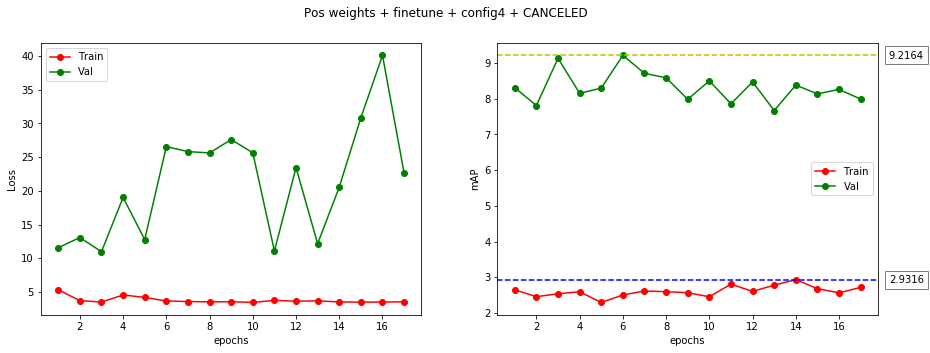

Batch size: 1
Weight decay: 0.0001
Learning rate: [[20, 0.00125], [20, 0.000125], [15, 1.25e-05]]
---------------------------------------------------------------------------------------------------------------



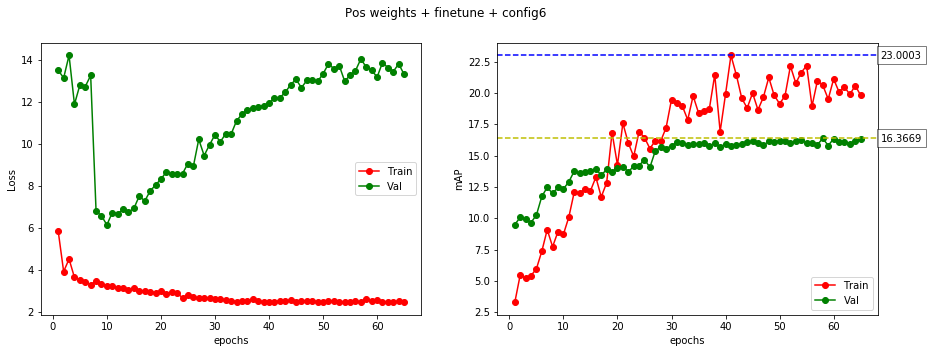

Batch size: 8
Weight decay: 1e-07
Learning rate: [[30, 0.00125], [20, 0.000125], [15, 1.25e-05]]
---------------------------------------------------------------------------------------------------------------



In [3]:
# AML, 2GPU, pre-trained, pyVideoResearch train config

show_results('charades_aml_original_config.log', 'charades_nonlocal.json', 'Pos weights + finetune + original config')
show_results('charades_aml_pos_weights_gsig.log', 'config_gsig.json', 'Pos weights + finetune + gsig config + CANCELED', remove_first=True)
# show_results('charades_aml_pos_weights_finetune.log', 'config0.json', 'Pos weights + finetune + config0')
show_results('charades_aml_config1.log', 'config1.json', 'Pos weights + finetune + config1')
show_results('charades_aml_config2.log', 'config2.json', 'Pos weights + finetune + config2')
show_results('charades_aml_config3.log', 'config3.json', 'Pos weights + finetune + config3')
show_results('charades_aml_config4.log', 'config4.json', 'Pos weights + finetune + config4 + CANCELED')
show_results('charades_aml_config6.log', 'config6.json', 'Pos weights + finetune + config6')


In [4]:
# V2 code (simpler transforms + 64 targets per video + conv3d as fc)..
# AML

# show_results('v2/32x2_original_config.log', 'charades_nonlocal.json', 'Original config + 32x2')
# show_results('v2/32x2_gsig_config.log', 'config_gsig.json', 'Gsig config + 32x2')
# show_results('v2/32x2_config1.log', 'config1.json', 'Config1 + 32x2')
# show_results('v2/32x2_config2.log', 'config2.json', 'Config2 + 32x2')

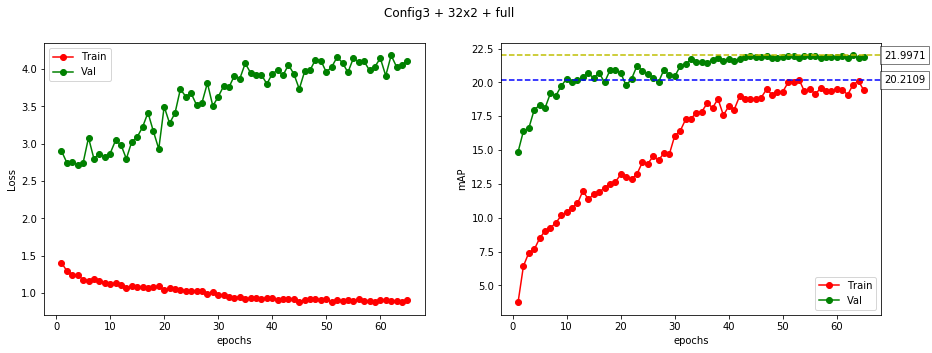

Batch size: 5
Weight decay: 1e-06
Learning rate: [[30, 0.00125], [20, 0.000125], [15, 1.25e-05]]
---------------------------------------------------------------------------------------------------------------



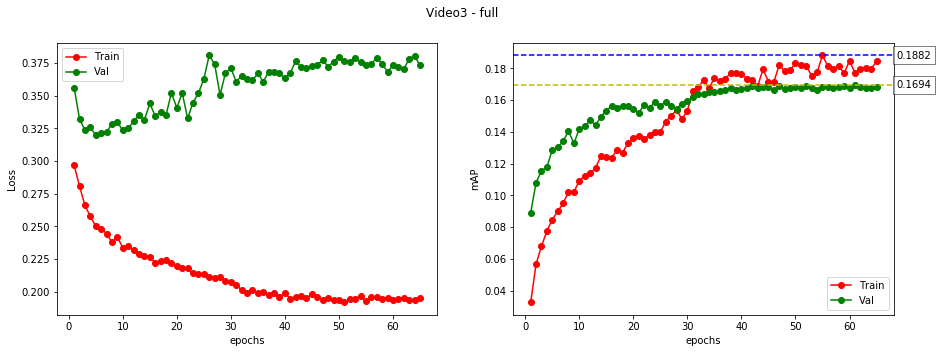

Batch size: 5
Weight decay: 1e-06
Learning rate: [[30, 0.00125], [20, 0.000125], [15, 1.25e-05]]
---------------------------------------------------------------------------------------------------------------



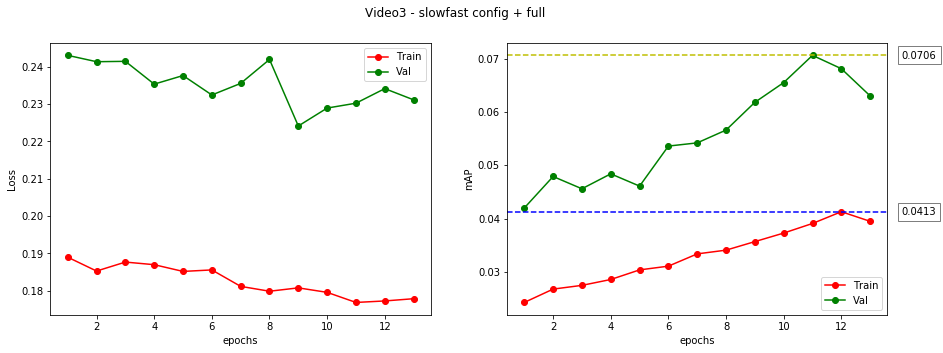

Batch size: 8
Weight decay: 0.0001
Learning rate: [[25, 0.0375], [15, 0.00375], [10, 0.000375]]
---------------------------------------------------------------------------------------------------------------



In [36]:
# AML Full dataset

show_results('charades_aml_32_config3_full.log', 'config3.json', 'Config3 + 32x2 + full')
show_results('charades_config3_video3_full.log', 'config3.json', 'Video3 - full')
show_results('charades_slowfast_config_video3.log', 'config_slowfast.json', 'Video3 - slowfast config + full')

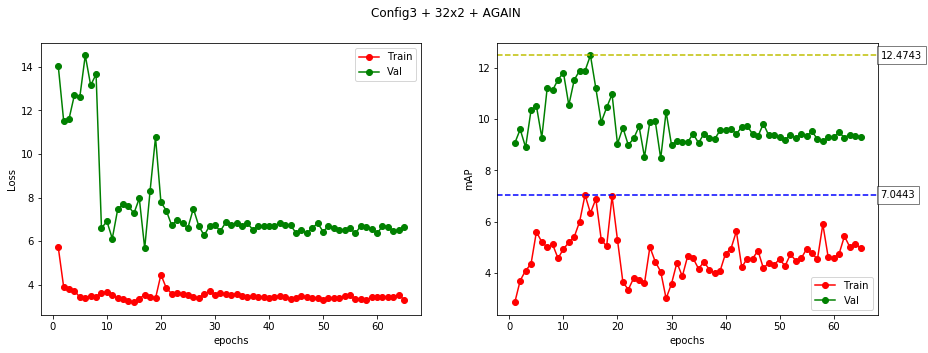

Batch size: 5
Weight decay: 1e-06
Learning rate: [[30, 0.00125], [20, 0.000125], [15, 1.25e-05]]
---------------------------------------------------------------------------------------------------------------



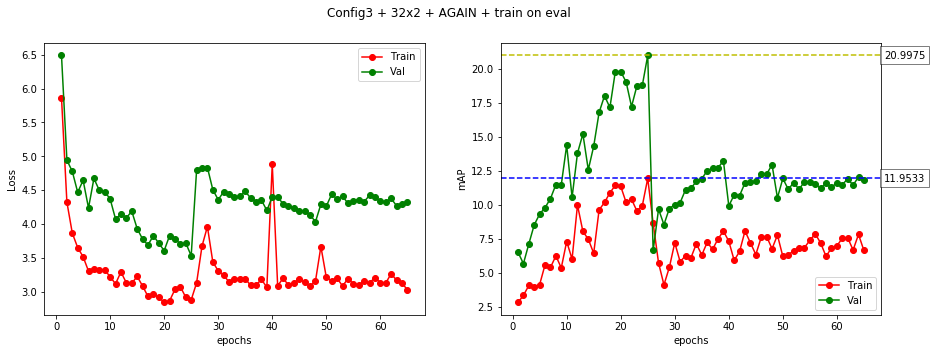

Batch size: 5
Weight decay: 1e-06
Learning rate: [[30, 0.00125], [20, 0.000125], [15, 1.25e-05]]
---------------------------------------------------------------------------------------------------------------



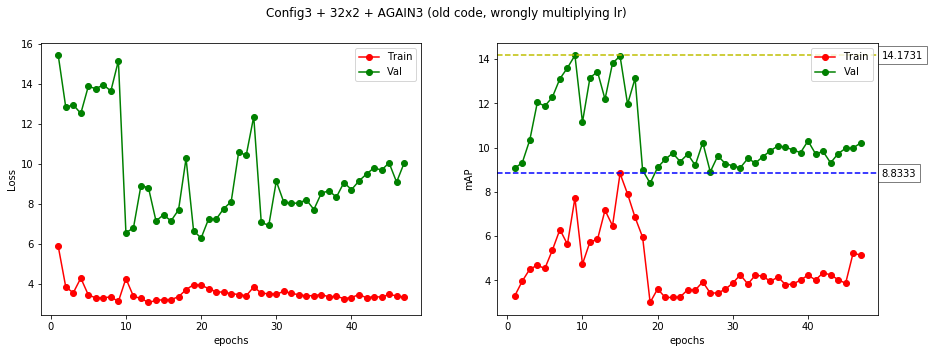

Batch size: 5
Weight decay: 1e-06
Learning rate: [[30, 0.00125], [20, 0.000125], [15, 1.25e-05]]
---------------------------------------------------------------------------------------------------------------



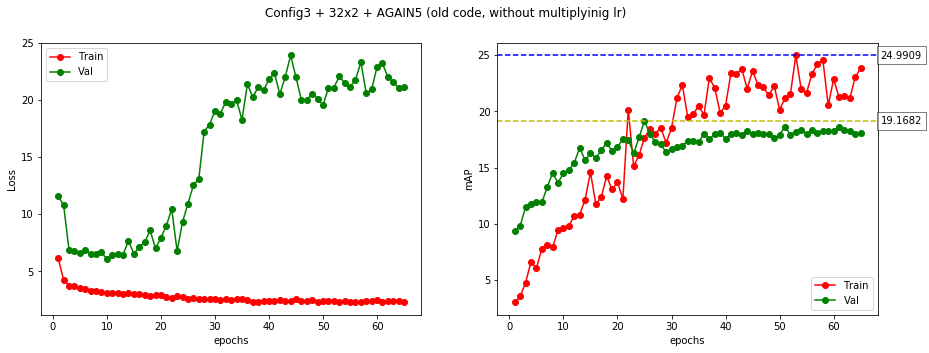

Batch size: 5
Weight decay: 1e-06
Learning rate: [[30, 0.00125], [20, 0.000125], [15, 1.25e-05]]
---------------------------------------------------------------------------------------------------------------



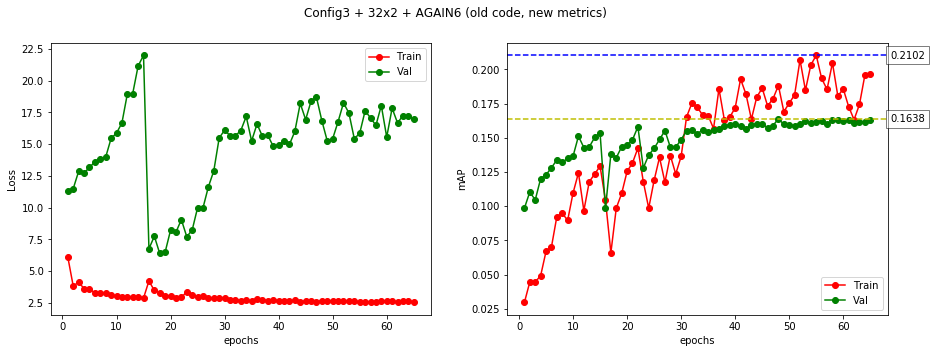

Batch size: 5
Weight decay: 1e-06
Learning rate: [[30, 0.00125], [20, 0.000125], [15, 1.25e-05]]
---------------------------------------------------------------------------------------------------------------



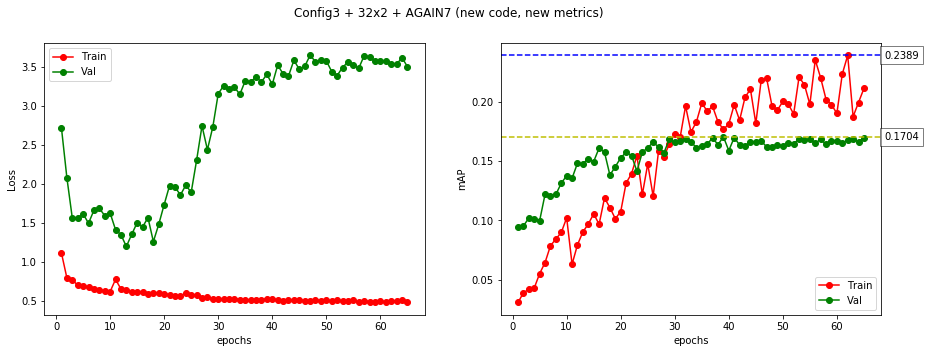

Batch size: 5
Weight decay: 1e-06
Learning rate: [[30, 0.00125], [20, 0.000125], [15, 1.25e-05]]
---------------------------------------------------------------------------------------------------------------



In [6]:
# AML using train data on eval

# show_results('charades_aml_train_eval.log', 'charades_nonlocal.json', 'Original config + 32x2 + train on eval')
# show_results('charades_aml_train_eval_config3.log', 'config3.json', 'Config3 + 32x2 + train on eval')
show_results('charades_again_config3.log', 'config3.json', 'Config3 + 32x2 + AGAIN')
show_results('charades_again_confi3_traineval.log', 'config3.json', 'Config3 + 32x2 + AGAIN + train on eval')
show_results('charades_again5_config3.log', 'config3.json', 'Config3 + 32x2 + AGAIN5 (old code, without multiplyinig lr)')
show_results('charades_again6_config3.log', 'config3.json', 'Config3 + 32x2 + AGAIN6 (old code, new metrics)')
show_results('charades_again7_config3.log', 'config3.json', 'Config3 + 32x2 + AGAIN7 (new code, new metrics)')

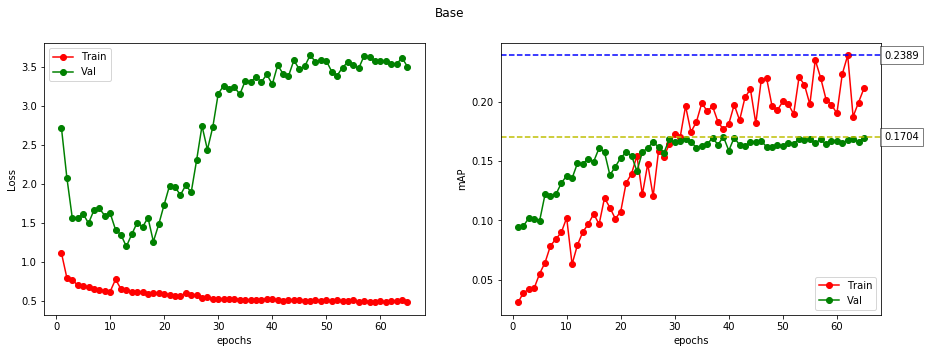

Batch size: 5
Weight decay: 1e-06
Learning rate: [[30, 0.00125], [20, 0.000125], [15, 1.25e-05]]
---------------------------------------------------------------------------------------------------------------



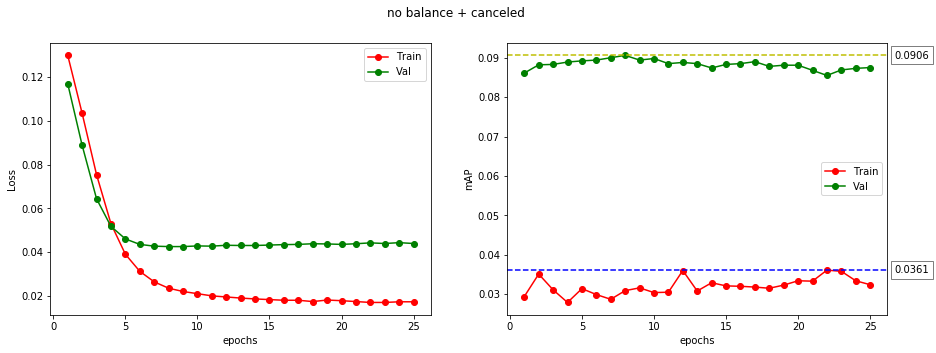

Batch size: 5
Weight decay: 1e-06
Learning rate: [[30, 0.00125], [20, 0.000125], [15, 1.25e-05]]
---------------------------------------------------------------------------------------------------------------



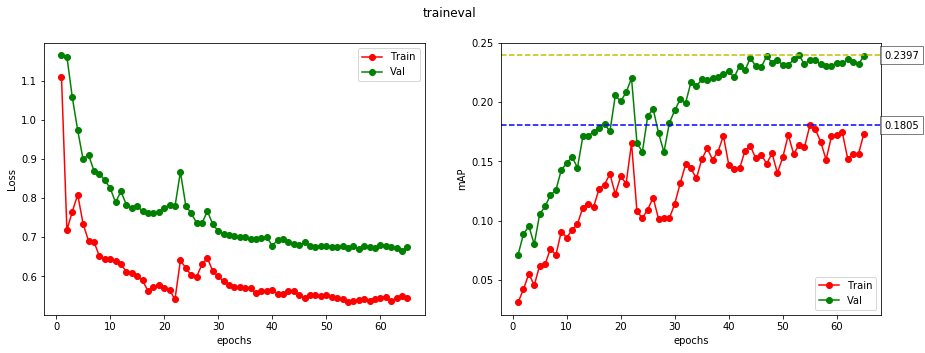

Batch size: 5
Weight decay: 1e-06
Learning rate: [[30, 0.00125], [20, 0.000125], [15, 1.25e-05]]
---------------------------------------------------------------------------------------------------------------



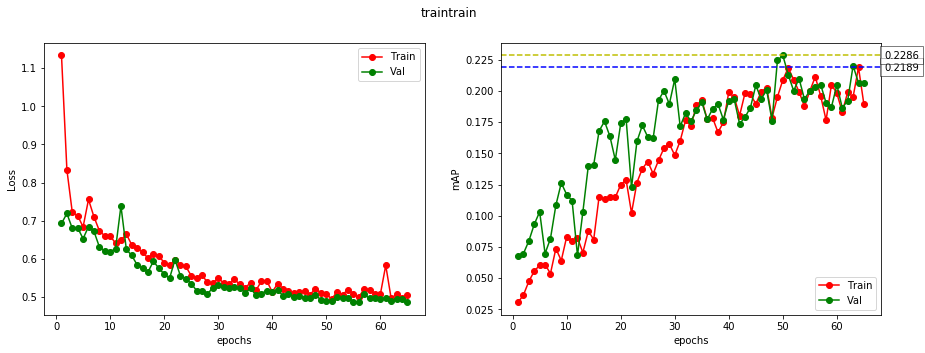

Batch size: 5
Weight decay: 1e-06
Learning rate: [[30, 0.00125], [20, 0.000125], [15, 1.25e-05]]
---------------------------------------------------------------------------------------------------------------



In [8]:
# AML, config3 + again7 (new code)

show_results('charades_again7_config3.log', 'config3.json', 'Base')
show_results('charades_again7_config3_nobalance.log', 'config3.json', 'no balance + canceled')
show_results('charades_again7_config3_traineval.log', 'config3.json', 'traineval')
show_results('charades_again7_config3_traintrain.log', 'config3.json', 'traintrain')

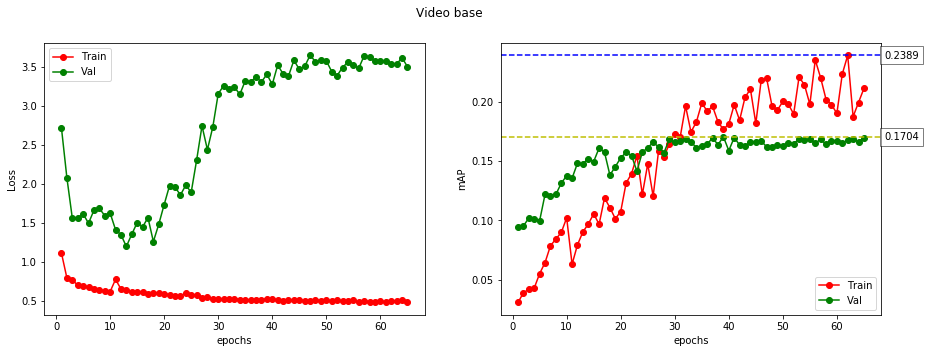

Batch size: 5
Weight decay: 1e-06
Learning rate: [[30, 0.00125], [20, 0.000125], [15, 1.25e-05]]
---------------------------------------------------------------------------------------------------------------



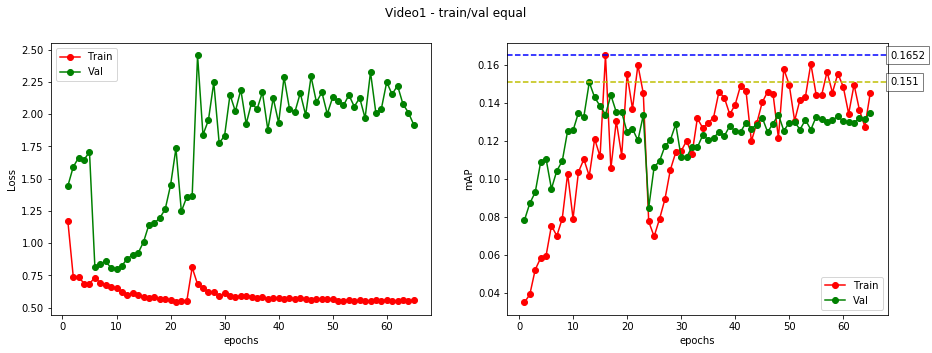

Batch size: 5
Weight decay: 1e-06
Learning rate: [[30, 0.00125], [20, 0.000125], [15, 1.25e-05]]
---------------------------------------------------------------------------------------------------------------



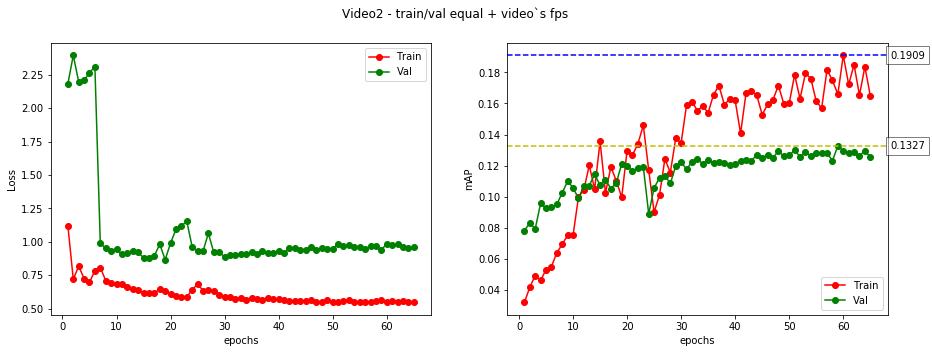

Batch size: 5
Weight decay: 1e-06
Learning rate: [[30, 0.00125], [20, 0.000125], [15, 1.25e-05]]
---------------------------------------------------------------------------------------------------------------



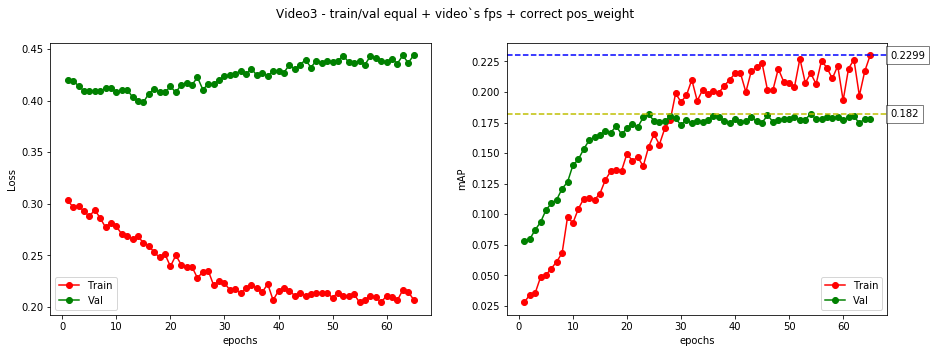

Batch size: 5
Weight decay: 1e-06
Learning rate: [[30, 0.00125], [20, 0.000125], [15, 1.25e-05]]
---------------------------------------------------------------------------------------------------------------



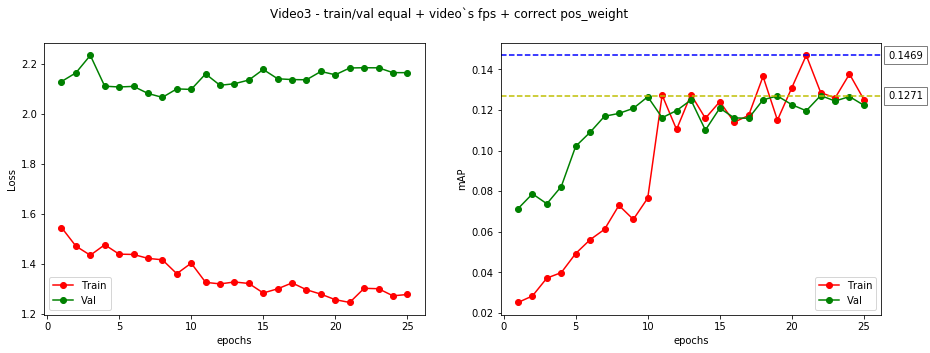

Batch size: 1
Weight decay: 0.0001
Learning rate: [[10, 0.00125], [10, 0.000125], [5, 1.25e-05]]
---------------------------------------------------------------------------------------------------------------



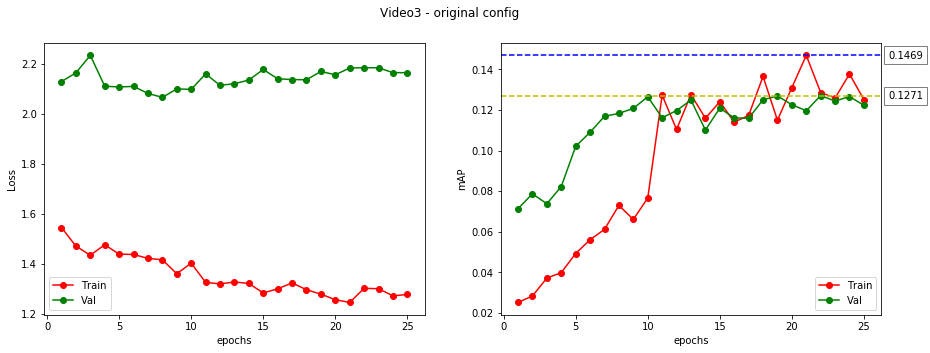

Batch size: 1
Weight decay: 0.0001
Learning rate: [[10, 0.00125], [10, 0.000125], [5, 1.25e-05]]
---------------------------------------------------------------------------------------------------------------



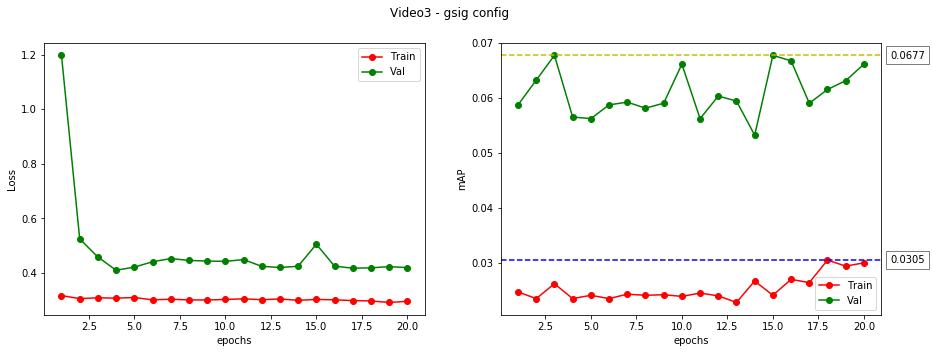

Batch size: 5
Weight decay: 1e-07
Learning rate: [[15, 0.375], [40, 0.0375], [45, 0.00375]]
---------------------------------------------------------------------------------------------------------------



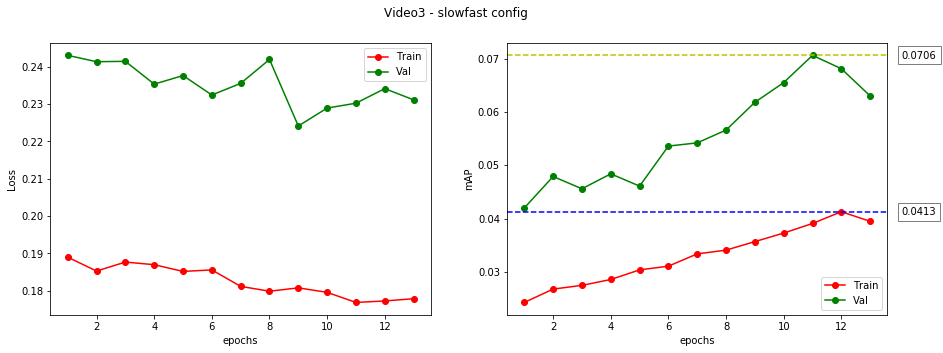

Batch size: 8
Weight decay: 0.0001
Learning rate: [[25, 0.0375], [15, 0.00375], [10, 0.000375]]
---------------------------------------------------------------------------------------------------------------



In [35]:

show_results('charades_again7_config3.log', 'config3.json', 'Video base')
show_results('charades_config3_video1.log', 'config3.json', 'Video1 - train/val equal')
show_results('charades_config3_video2.log', 'config3.json', 'Video2 - train/val equal + video`s fps')
show_results('charades_config3_video3.log', 'config3.json', 'Video3 - train/val equal + video`s fps + correct pos_weight')
show_results(
    'charades_orig_config_video3.log', 'charades_nonlocal.json', 'Video3 - train/val equal + video`s fps + correct pos_weight')
# show_results('charades_config3_video4.log', 'config3.json', 'Video4 - train/val equal + video`s fps + no pos_weight')
show_results('charades_orig_config_video3.log', 'charades_nonlocal.json', 'Video3 - original config')
show_results('charades_config_gsig_video3.log', 'config_gsig.json', 'Video3 - gsig config')


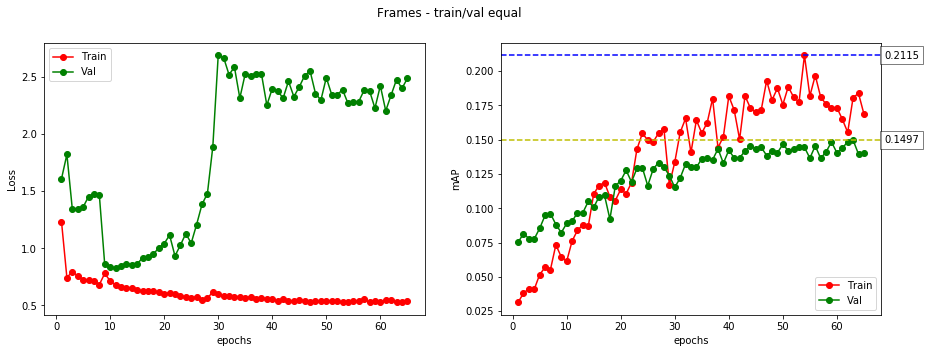

Batch size: 5
Weight decay: 1e-06
Learning rate: [[30, 0.00125], [20, 0.000125], [15, 1.25e-05]]
---------------------------------------------------------------------------------------------------------------



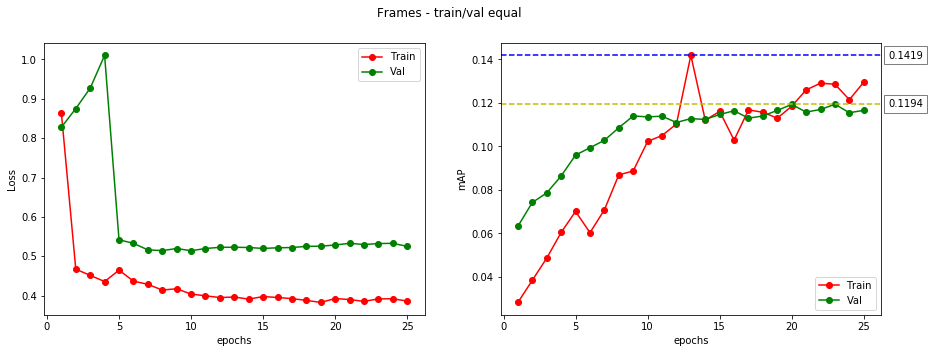

Batch size: 8
Weight decay: 0.0001
Learning rate: [[10, 0.00125], [10, 0.000125], [5, 1.25e-05]]
---------------------------------------------------------------------------------------------------------------



In [28]:
show_results('charades_config3_frames.log', 'config3.json', 'Frames - train/val equal')
show_results('charades_config0_frames.log', 'config0.json', 'Frames - train/val equal')